<a href="https://colab.research.google.com/github/Akshhxt/TensorFlow/blob/main/Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
print(tf.__version__)

2.13.1


In [2]:
## Creating some data to view and fit

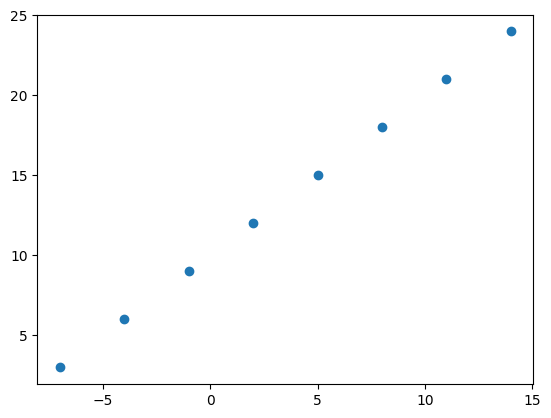

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])


# Create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualize it
plt.scatter(X,y);


In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
## Input and Output Shapes

In [6]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [7]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
X[0].ndim

0

In [10]:
# Turn our numpy arrays into Tensors
X = tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

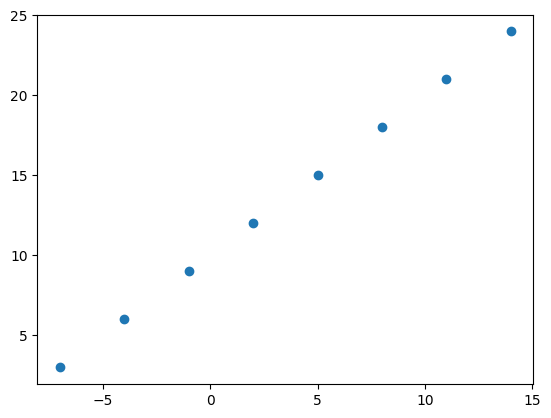

In [11]:
plt.scatter(X,y);

In [12]:
## Steps in Modelling

#1. Creating a model
#2. Compiling a model
#3. Fitting a


In [13]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),  # Batch normalization layer
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])



# Fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.5000 - mae: 13.5000
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2135 - mae: 12.2135
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 9.9731 - mae: 9.9731
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 9.7672 - mae: 9.7672
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8201 - mae: 6.8201
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 2.0811 - mae: 2.0811
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 3.0056 - mae: 3.0056
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 3.1806 - mae: 3.1806
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 1.6940 - mae: 1.6940
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 2.0019 - mae: 2.0019
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - l

In [14]:
# Predict with the model
X_pred = np.array([[17.0]])  # Creating a 2D array with one element
y_pred = model.predict(X_pred)
print(y_pred)


1/1 [==============================] - 0s 126ms/step
[[61.358738]]


## Evaluating a model

In [15]:
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [16]:
y= X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

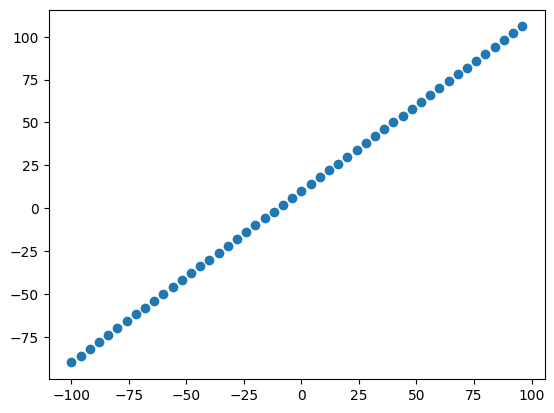

In [17]:
#Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,y);

In [18]:
X_train = X[:40]
y_train=y[:40]

X_test=X[40:]
y_test=y[40:]

In [19]:
X_train = tf.cast(X_train, dtype = tf.float32)
X_test = tf.cast(X_test, dtype = tf.float32)
y_train = tf.cast(y_train, dtype = tf.float32)
y_test = tf.cast(y_test, dtype = tf.float32)

### Visualizing the data

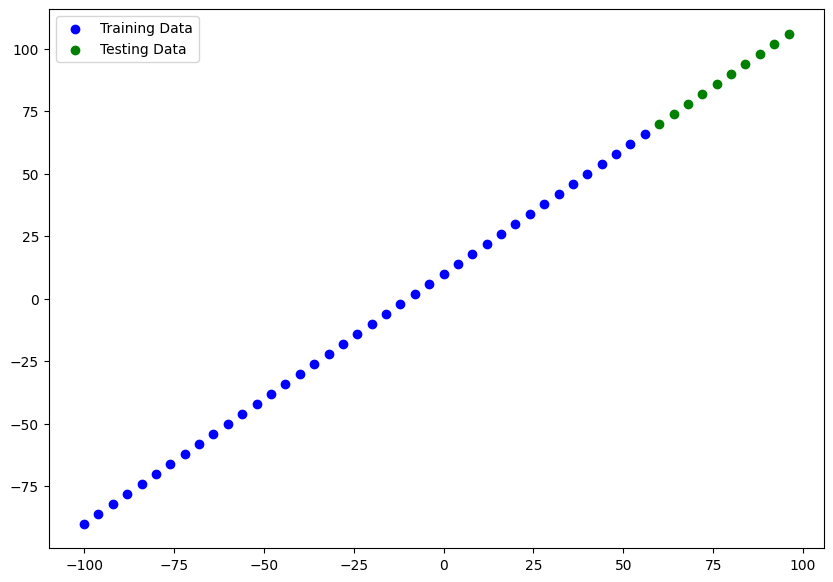

In [20]:
plt.figure(figsize=(10,7))
plt.scatter(X_train , y_train , c="b", label="Training Data") # our model will learn this
plt.scatter(X_test , y_test , c="g", label ="Testing Data") #want our model to predict this (given X then what is y?)
plt.legend();

In [21]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)


X_train dtype: <dtype: 'float32'>
y_train dtype: <dtype: 'float32'>


In [22]:
X_train = tf.constant(X_train)
y_train=tf.constant(y_train)
X_test = tf.constant(X_test)
y_test=tf.constant(y_test)

In [23]:
# Lets have a look at how to build the neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=["mae"])

# 3. fit the model
model.fit(tf.expand_dims(X, axis=1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 71.0775 - mae: 71.0775
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 70.9724 - mae: 70.9724
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 70.8797 - mae: 70.8797
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 70.7793 - mae: 70.7793
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 70.6794 - mae: 70.6794
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 70.5820 - mae: 70.5820
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 70.4795 - mae: 70.4795
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 70.3810 - mae: 70.3810
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 70.2882 - mae: 70.2882
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 70.1858 - mae: 70.1858
Epoch 11/100
2/2 [==============================] - 0s 6ms/

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [26]:
# Lets create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total Params: total numbers of parameters in the model
* Trainable Params : these are the parameters (patterns) the model can update as it trains
* Non-Trainable Params : these parameters arent updated during training (this is typical when you bring in already learned patterns or parameters from other models using **transfer learning**

In [28]:
model.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=0)

In [29]:
#Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


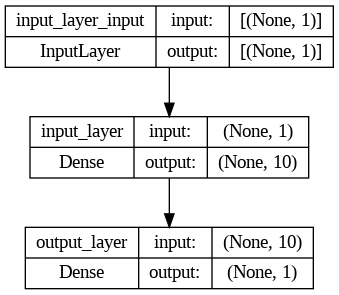

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

In [31]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 71ms/step


array([[ 93.72144],
       [ 99.83911],
       [105.95678],
       [112.07445],
       [118.19209],
       [124.30977],
       [130.42744],
       [136.5451 ],
       [142.66277],
       [148.78043]], dtype=float32)

In [32]:
y_pred = tf.squeeze(y_pred)

In [33]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
      dtype=float32)>

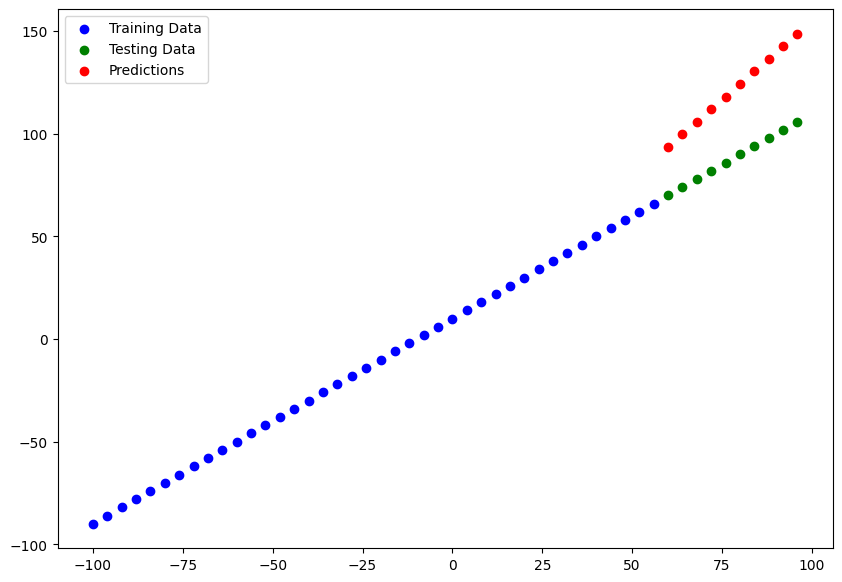

In [34]:
# Lets create a plotting function
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()


plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

In [35]:
# Evaluate the model on the test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 206ms/step - loss: 33.2509 - mae: 33.2509


[33.250938415527344, 33.250938415527344]

In [36]:
# Calculate the MAE
loss=tf.keras.losses.mean_absolute_error(y_test, tf.constant(y_pred))
loss

<tf.Tensor: shape=(), dtype=float32, numpy=33.25094>

In [37]:
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 93.72144,  99.83911, 105.95678, 112.07445, 118.19209, 124.30977,
       130.42744, 136.5451 , 142.66277, 148.78043], dtype=float32)>

In [38]:
# calculate the mae again
mae = tf.keras.losses.mean_absolute_error(y_test , (y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=33.25094>

In [39]:
# calculate the mse
mse = tf.keras.losses.mean_squared_error(y_test , y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1142.6221>

### Running experiments to improve our model

## Lets do 3 modelling experiments:
1. 1 layer, 100 epochs
2. 2 layers, 100 epochs
3. 2 layers, 500 epochs

**Build `model_1`**

In [40]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100,)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 30.7471 - mae: 30.7471
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 8.2990 - mae: 8.2990
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.4085 - mae: 10.4085
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 12.8610 - mae: 12.8610
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.9035 - mae: 11.9035
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 11.0311 - mae: 11.0311
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.4306 - mae: 8.4306
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 8.8628 - mae: 8.8628
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 16.9975 - mae: 16.9975
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 12.5279 - mae: 12.5279
Epoch 11/100
2/2 [==============================] - 0s 8ms/step 

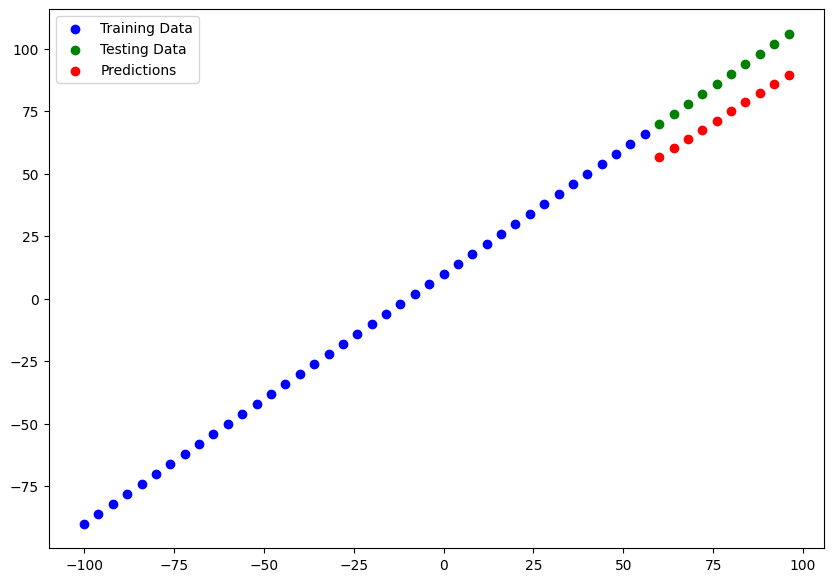

In [41]:
# Make and plot predictions for model_1
y_preds_1 = model_1(X_test)
plot_predictions(predictions=y_preds_1)

In [42]:
# Calculate model_1 evaluation metrics
mae_1 = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_preds_1))
mse_1 = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_preds_1))

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.910704>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.16464>)

**Build `model_2`**
*2 dense layers, trained for 100 epochs

In [43]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mean_absolute_error,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"])
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 33.2129 - mse: 1535.8813
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8269 - mse: 1004.5324
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 32.8041 - mse: 1618.5762
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 28.1908 - mse: 1171.9944
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 15.3253 - mse: 300.3011
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.1670 - mse: 182.9440
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.4613 - mse: 159.6013
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1951 - mse: 174.1166
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 41.6875 - mse: 2768.1489
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 28.9247 - mse: 1182.3567
Epoch 11/100
2/2 [========================

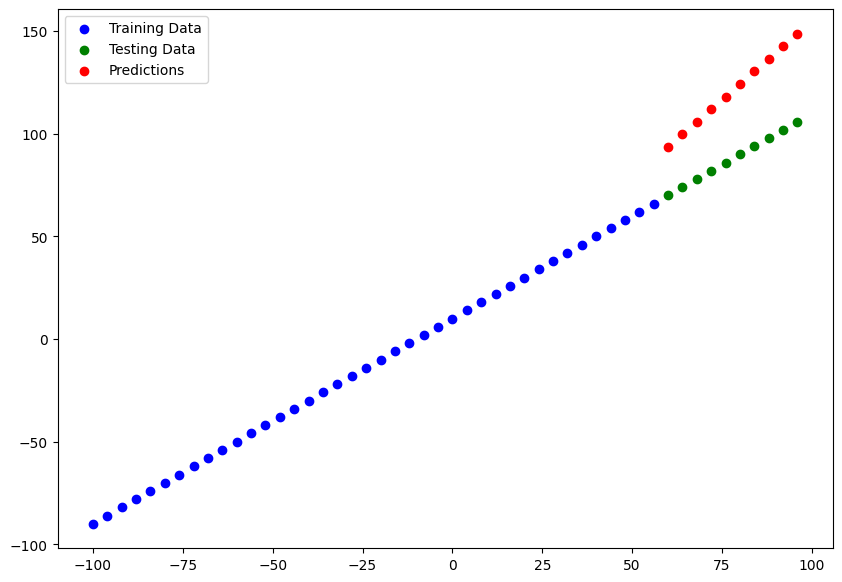

In [44]:
# Make and plot predictions for model_2
y_preds_2=model(X_test)
plot_predictions(predictions=y_preds_2)

In [45]:
# Calculate model_1 evaluation metrics
mae_2 = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_preds_2))

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.25094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1142.6221>)

**Build `model_3`**
*2 dense layers, trained for 500 epochs

In [46]:
# create model_3
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mean_absolute_error,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 10ms/step - loss: 28.1715 - mae: 28.1715
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 19.1922 - mae: 19.1922
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 26.4913 - mae: 26.4913
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 25.5396 - mae: 25.5396
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.0447 - mae: 14.0447
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.2235 - mae: 11.2235
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 12.2175 - mae: 12.2175
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 10.8708 - mae: 10.8708
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 37.9774 - mae: 37.9774
Epoch 10/500
2/2 [==============================] - 0s 10ms/step - loss: 25.5695 - mae: 25.5695
Epoch 11/500
2/2 [==============================] - 0s 8m

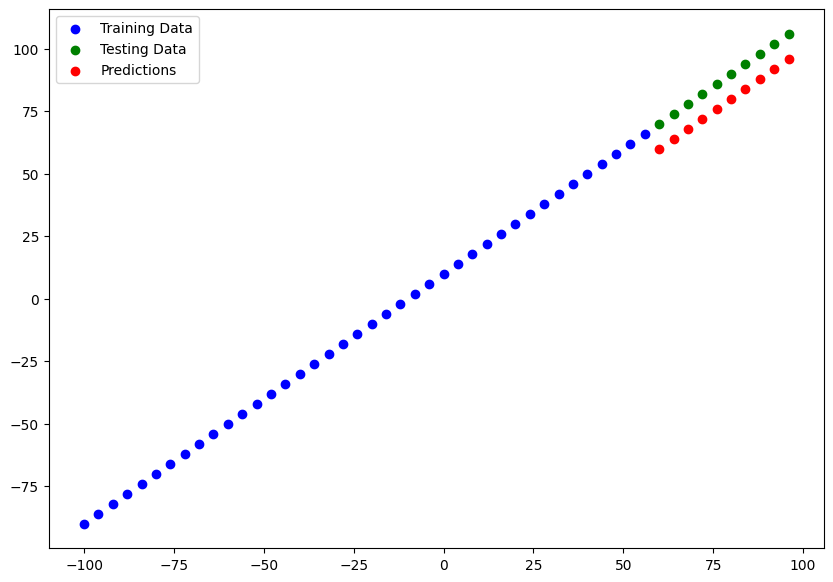

In [47]:
# Make and plot predictions for model_3
y_preds_3 = (X_test)
plot_predictions(predictions=y_preds_3)

**As you can see, we have trained our model for too long(overfitting), so this is giving is predictions worse than the previous ones**

In [48]:
# Calculate model_1 evaluation metrics
mae_3 = tf.keras.losses.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.keras.losses.mean_squared_error(y_test, tf.squeeze(y_preds_3))

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=10.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=100.0>)

### Comparing the results of our experiments

In [49]:
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.910704,223.164642
1,model_2,33.250938,1142.622070
2,model_3,10.000000,100.000000


In [50]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Saving our model

There are two main formats we can save our models to:
* The SavedModel format
* The HDF5 format

In [51]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [52]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Loading in a saved model

In [53]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Compare model_2 predictions with SavedModel formal model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 47ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [56]:
loaded_SavedModel_format_preds , model_2_preds

(array([[ 75.935936],
        [ 80.88202 ],
        [ 85.82811 ],
        [ 90.77421 ],
        [ 95.7203  ],
        [100.66639 ],
        [105.61249 ],
        [110.55857 ],
        [115.50468 ],
        [120.45075 ]], dtype=float32),
 array([[ 75.935936],
        [ 80.88202 ],
        [ 85.82811 ],
        [ 90.77421 ],
        [ 95.7203  ],
        [100.66639 ],
        [105.61249 ],
        [110.55857 ],
        [115.50468 ],
        [120.45075 ]], dtype=float32))

In [57]:
# Load the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compare model_2 predictions with .h5 format model predictions
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 44ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

### A larger example

In [59]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [61]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head() # view the converted columns


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [63]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis =1)
y = insurance_one_hot["charges"]

In [64]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [65]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [66]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # set random state for reproducible splits
len(X) , len(X_train) , len(X_test)

(1338, 1070, 268)

In [67]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [68]:
# Build a neural network (sort of like model_2 above)
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8696.9053 - mae: 8696.9053
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7871.1113 - mae: 7871.1113
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7369.4570 - mae: 7369.4570
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7670.3247 - mae: 7670.3247
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7659.7632 - mae: 7659.7632
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7611.4556 - mae: 7611.4556
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7574.5806 - mae: 7574.5806
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7727.1606 - mae: 7727.1606
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7584.0205 - mae: 7584.0205
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7735.0571 - mae: 7735.0571

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).

In [69]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)


In [70]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3482.9839 - mae: 3482.9839


[3482.98388671875, 3482.98388671875]

 Using a larger model and the Adam optimizer results in almost half the error as the previous model.

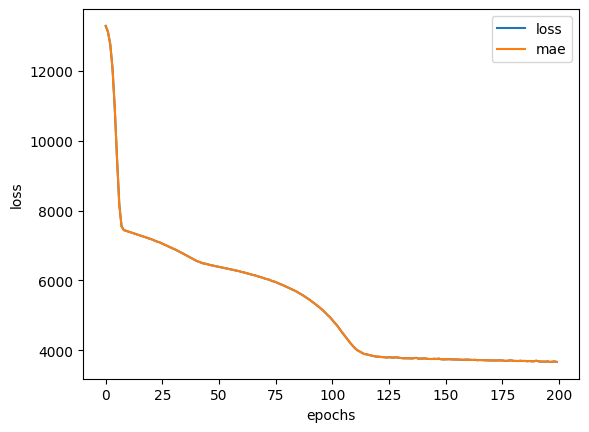

In [71]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [72]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [73]:
# Evaluate the model trained for 300 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3219.0986 - mae: 3219.0986


(3219.0986328125, 3219.0986328125)

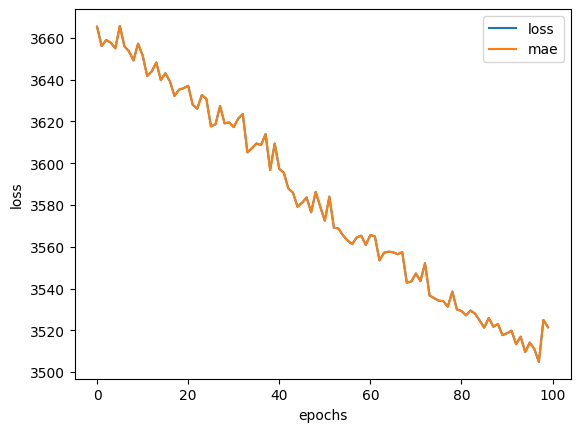

In [74]:

# Plot the model trained for 300 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

### Preprocessing data (normalization and standardization)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [76]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [79]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]



age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [81]:

# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [82]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [83]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [84]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3166.1956 - mae: 3166.1956


In [85]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3219.0986328125, 3166.195556640625)